# Projeto de Transmissão de Energia Sem Fio (WPT)

## Circuitos

![Circuito em série](./img/serie.png)

![Circuito em paralelo](./img/paralelo.png)

## Simulações

In [202]:
# Vamos importar os módulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

### Definindo parâmetros

In [203]:
# Declarando variáveis 

R1 = R2 = Rdc = 0.2

Rc= 3
listaRc = [1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40]

L1 = L2 = L = 196e-6

C1 = C2 = 0.1e-6
listaC = [0.1e-6, 150e-9, 0.47e-6, 1e-6, 4.7e-6]

Ufonte = 10 * 2/pi

kFixo = 0.2
PossiveisK = np.linspace(0, 1, 500)

freqFixo = 21500
PossiveisFreq = np.arange(1e-3,100e3,500)

### Definindo funções importantes 

In [204]:
# Função que calcula o transformador em série
def calculaTransformadorSerie(k, f):

    # Indutância aproximada das bobinas
    w = 2*math.pi*f
    M = k*sqrt(L1*L2)

    # Reatâncias
    XM = 1j*w*M
    XC1 = 1/(w*C1*1j)
    XC2 = 1/(w*C2*1j)
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    # Reatância equivalente
    Xeq = Rc+XC2
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, Xeq+R2+XL2]])
    V=np.array([Ufonte,0])
    i=np.dot(linalg.inv(Z),V)

    # Corrente no primário e secundário
    i1 =  i[0]
    i2 =  i[1]
    
    # DDP e corrente na carga
    V2 = Rc*i2
    ic = i2
    
    return i1, i2, ic, V2

In [205]:
# Função que calcula o transformador em paralelo
def calculaTransformadorParalelo(k, f):

    # Indutância aproximada das bobinas
    w = 2*math.pi*f
    M = k*sqrt(L1*L2)

    # Reatâncias
    XM = 1j*w*M
    XC1 = 1/(w*C1*1j)
    XC2 = 1/(w*C2*1j)
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    # Reatância equivalente
    Xeq = (Rc*XC2 / (Rc+XC2))
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, Xeq+R2+XL2]])
    V=np.array([Ufonte,0])
    i=np.dot(linalg.inv(Z),V)

    # Corrente no primário e secundário
    i1 =  i[0]
    i2 =  i[1]
    
    # DDP e corrente na carga
    V2 = Xeq*i2
    ic = V2/Rc
    
    return i1, i2, ic, V2

In [206]:
# Função que calcula a resistência elétrica das bobinas
def calculaR(f):
    R = Rdc + (Rdc/100e3) * f
    return R

### C2 em Série vs C2 em Paralelo

#### C2 em Série

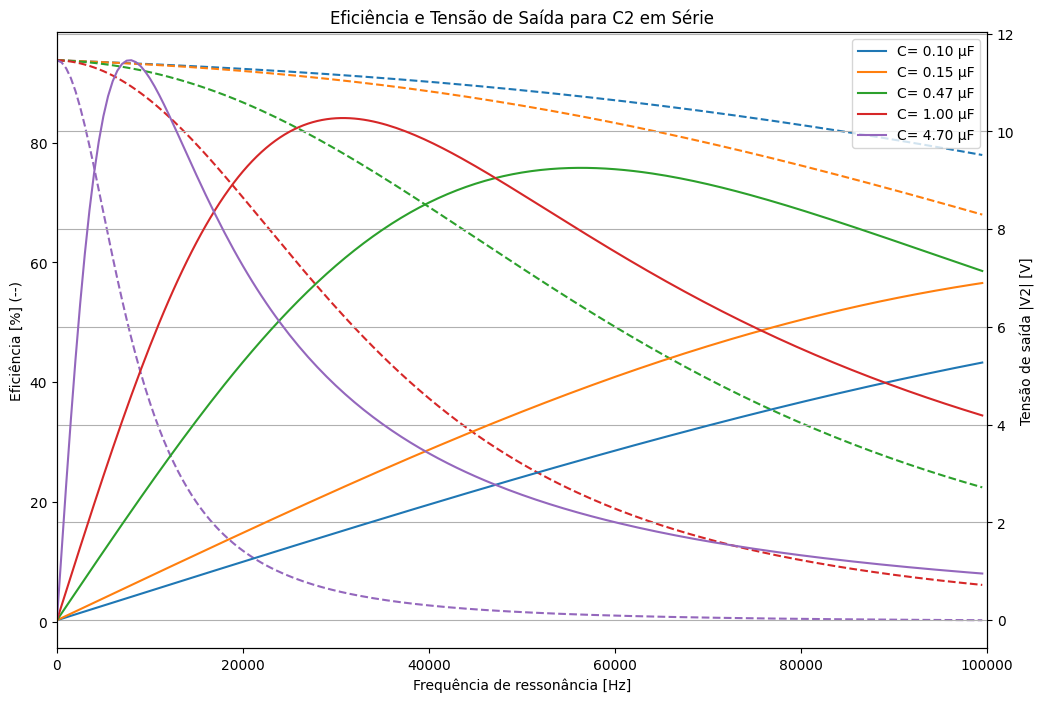

In [207]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    listaEficiencia = []

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorSerie(kFixo, f)

        listaV2.append(abs(V2))
        
        eficiencia = (((1/2)*V2*i2.conjugate()).real/((1/2)*Ufonte*i1.conjugate()).real)*100
        listaEficiencia.append(eficiencia)

    ax1.plot(PossiveisFreq, listaEficiencia, "--")
    ax2.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')


plt.title("Eficiência e Tensão de Saída para C2 em Série")
ax1.set_xlabel("Frequência de ressonância [Hz]")
ax1.set_ylabel("Eficiência [%] (--)")
ax2.set_ylabel("Tensão de saída |V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()

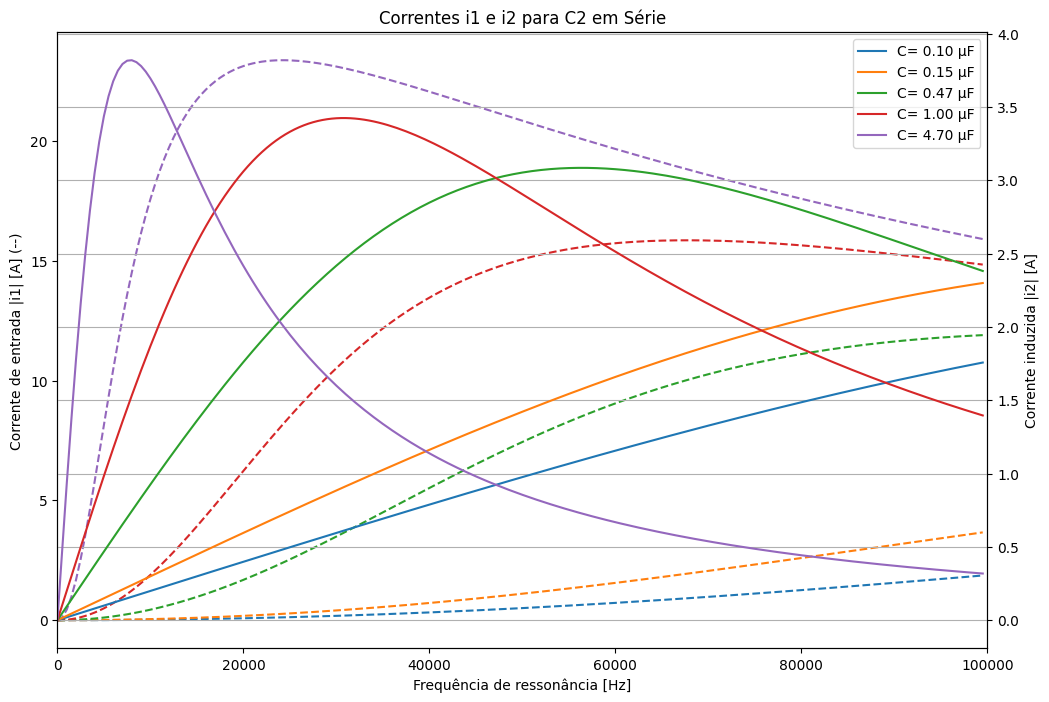

In [208]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()


for C in listaC:
    C1 = C2 = C
    listaI1= []
    listaI2= []

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorSerie(kFixo, f)

        listaI1.append(np.abs(i1))
        listaI2.append(np.abs(i2))

    ax1.plot(PossiveisFreq, listaI1, "--")
    ax2.plot(PossiveisFreq, listaI2, label=f'C= {C*1e6:0.2f} µF')

 
plt.title("Correntes i1 e i2 para C2 em Série")
ax1.set_xlabel("Frequência de ressonância [Hz]")
ax1.set_ylabel("Corrente de entrada |i1| [A] (--)")
ax2.set_ylabel("Corrente induzida |i2| [A]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.show()

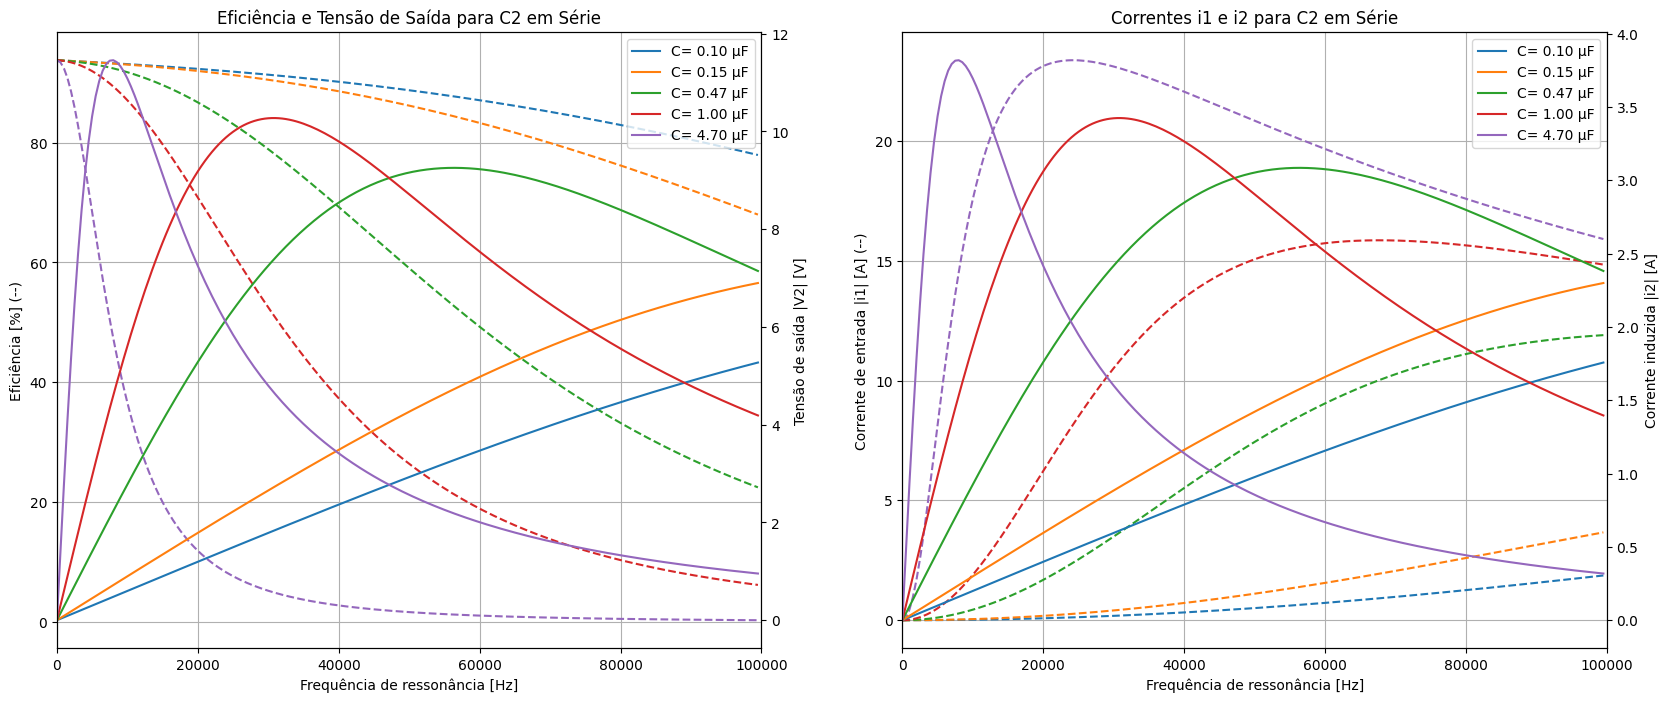

In [209]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(20,8))
ax2 = ax1.twinx()
ax4 = ax3.twinx()


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    listaEficiencia = []
    listaI1= []
    listaI2= []

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorSerie(kFixo, f)

        listaV2.append(abs(V2))
        
        eficiencia = (((1/2)*V2*ic.conjugate()).real/((1/2)*Ufonte*i1.conjugate()).real)*100
        listaEficiencia.append(eficiencia)

        listaI1.append(np.abs(i1))
        listaI2.append(np.abs(ic))

    ax1.plot(PossiveisFreq, listaEficiencia, "--")
    ax2.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')

    ax3.plot(PossiveisFreq, listaI1, "--")
    ax4.plot(PossiveisFreq, listaI2, label=f'C= {C*1e6:0.2f} µF')

 
ax1.set_title("Eficiência e Tensão de Saída para C2 em Série")
ax1.set_xlim(0,100e3)
ax1.grid(True)
ax1.set_xlabel("Frequência de ressonância [Hz]")
ax1.set_ylabel("Eficiência [%] (--)")
ax2.set_ylabel("Tensão de saída |V2| [V]")
ax2.legend()

ax3.set_title("Correntes i1 e i2 para C2 em Série")
ax3.set_xlim(0,100e3)
ax3.grid(True)
ax3.set_xlabel("Frequência de ressonância [Hz]")
ax3.set_ylabel("Corrente de entrada |i1| [A] (--)")
ax4.set_ylabel("Corrente induzida |i2| [A]")
ax4.legend()

plt.show()

#### C2 em Paralelo

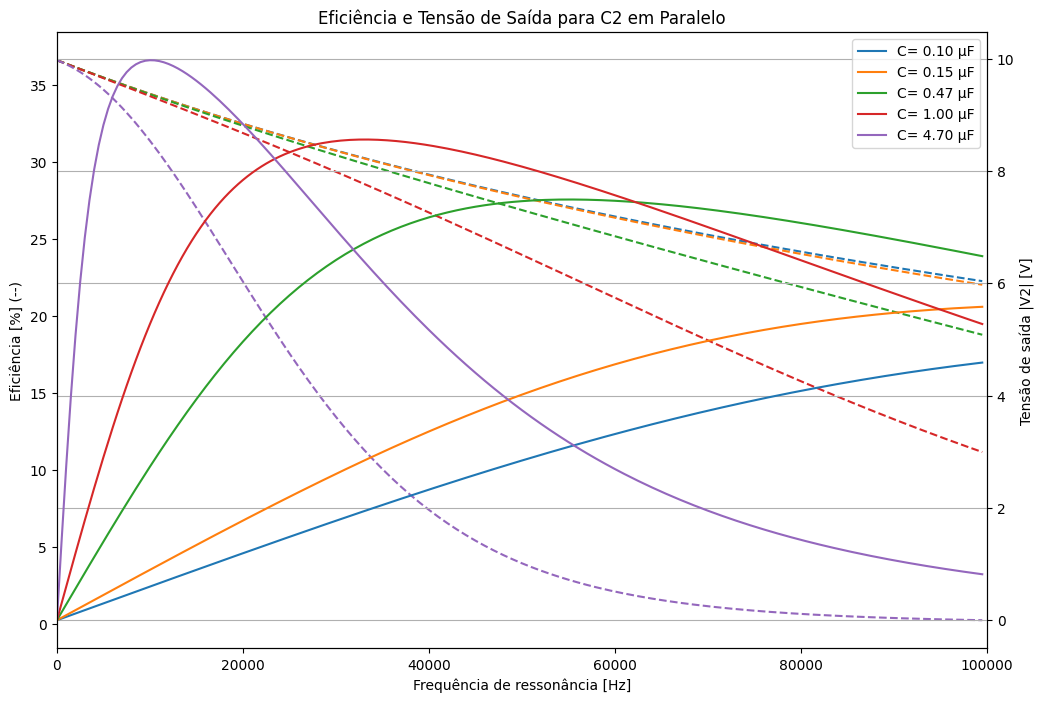

In [210]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    listaEficiencia = []

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorParalelo(kFixo, f)

        listaV2.append(abs(V2))
        
        eficiencia = (((1/2)*V2*ic.conjugate()).real/((1/2)*Ufonte*i1.conjugate()).real)*100
        listaEficiencia.append(eficiencia)

    ax1.plot(PossiveisFreq, listaEficiencia, "--")
    ax2.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')


plt.title("Eficiência e Tensão de Saída para C2 em Paralelo")
ax1.set_xlabel("Frequência de ressonância [Hz]")
ax1.set_ylabel("Eficiência [%] (--)")
ax2.set_ylabel("Tensão de saída |V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()

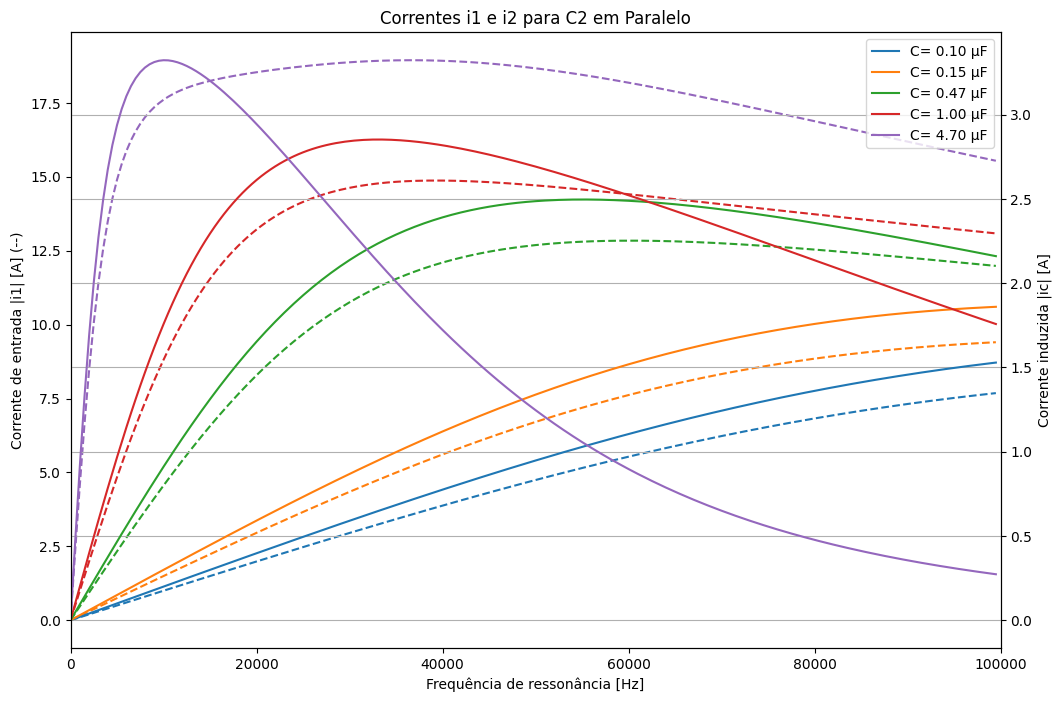

In [211]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()


for C in listaC:
    C1 = C2 = C
    listaI1= []
    listaIc= []

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorParalelo(kFixo, f)

        listaI1.append(np.abs(i1))
        listaIc.append(np.abs(ic))

    ax1.plot(PossiveisFreq, listaI1, "--")
    ax2.plot(PossiveisFreq, listaIc, label=f'C= {C*1e6:0.2f} µF')

 
plt.title("Correntes i1 e i2 para C2 em Paralelo")
ax1.set_xlabel("Frequência de ressonância [Hz]")
ax1.set_ylabel("Corrente de entrada |i1| [A] (--)")
ax2.set_ylabel("Corrente induzida |ic| [A]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.show()

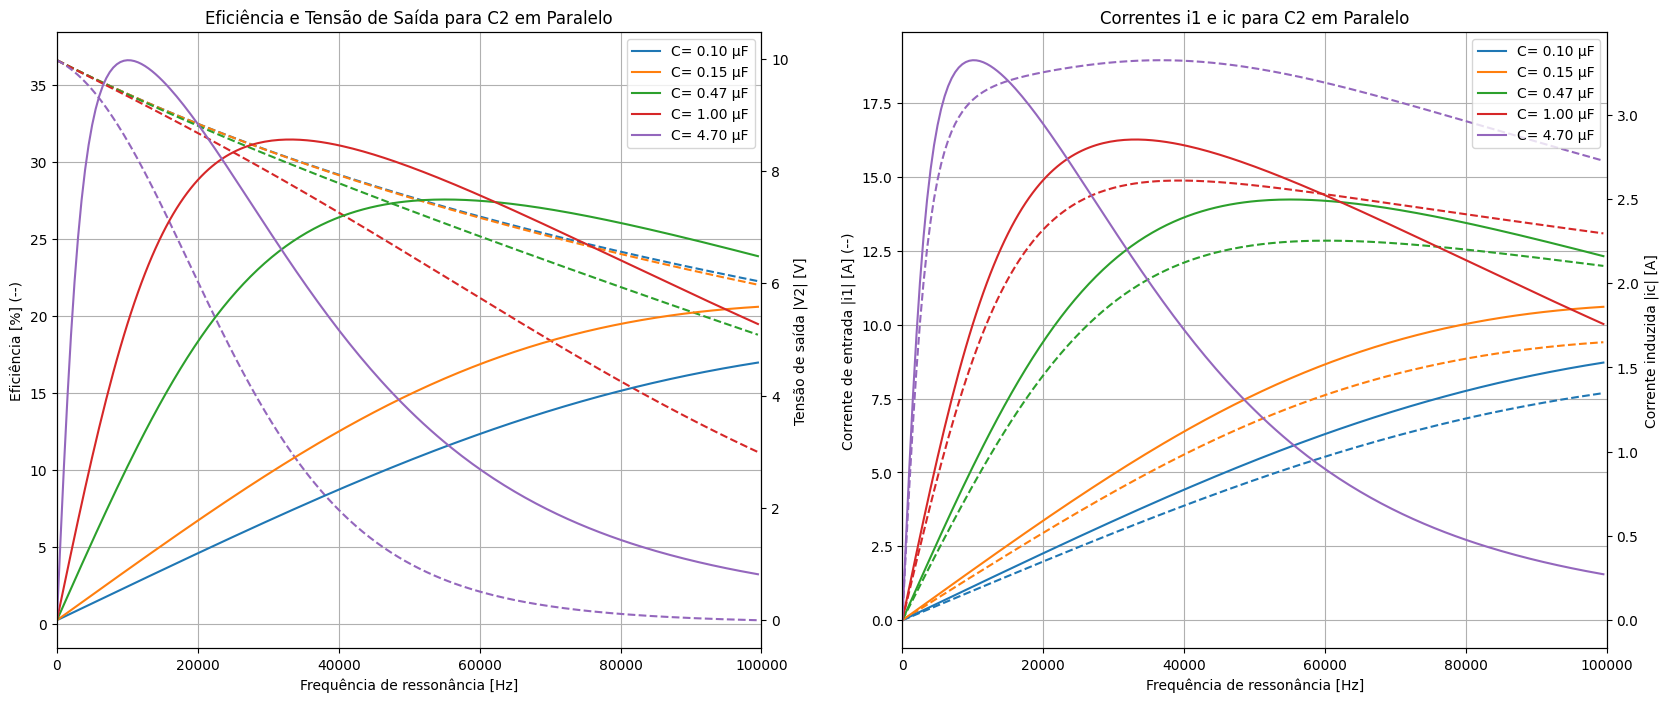

In [212]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(20,8))
ax2 = ax1.twinx()
ax4 = ax3.twinx()


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    listaEficiencia = []
    listaI1= []
    listaIc= []

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorParalelo(kFixo, f)

        listaV2.append(abs(V2))
        
        eficiencia = (((1/2)*V2*ic.conjugate()).real/((1/2)*Ufonte*i1.conjugate()).real)*100
        listaEficiencia.append(eficiencia)

        listaI1.append(np.abs(i1))
        listaIc.append(np.abs(ic))

    ax1.plot(PossiveisFreq, listaEficiencia, "--")
    ax2.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')

    ax3.plot(PossiveisFreq, listaI1, "--")
    ax4.plot(PossiveisFreq, listaIc, label=f'C= {C*1e6:0.2f} µF')


ax1.set_title("Eficiência e Tensão de Saída para C2 em Paralelo")
ax1.set_xlim(0,100e3)
ax1.grid(True)
ax1.set_xlabel("Frequência de ressonância [Hz]")
ax1.set_ylabel("Eficiência [%] (--)")
ax2.set_ylabel("Tensão de saída |V2| [V]")
ax2.legend()

ax3.set_title("Correntes i1 e ic para C2 em Paralelo")
ax3.set_xlim(0,100e3)
ax3.grid(True)
ax3.set_xlabel("Frequência de ressonância [Hz]")
ax3.set_ylabel("Corrente de entrada |i1| [A] (--)")
ax4.set_ylabel("Corrente induzida |ic| [A]")
ax4.legend()

plt.show()

### Definindo Indutância

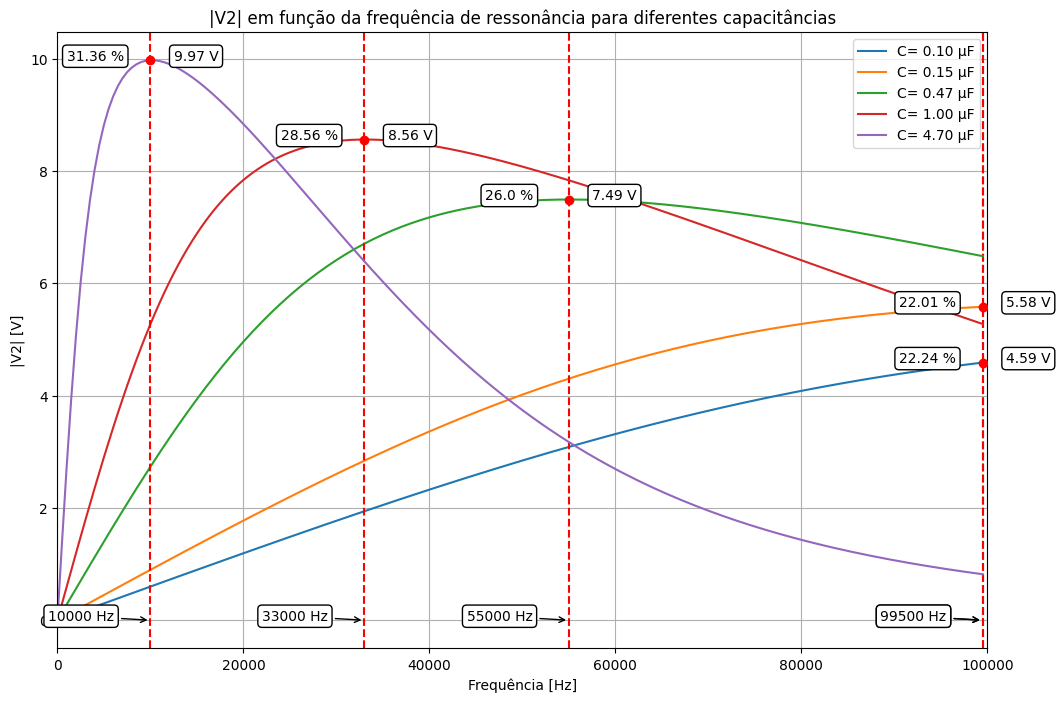

In [213]:
plt.figure(figsize=(12,8))


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    maxV2 = 0
    freqMax = 0

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorParalelo(kFixo, f)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            freqMax = f
            eficiencia = (((1/2)*V2*i2.conjugate()).real/((1/2)*Ufonte*i1.conjugate()).real)*100

    
    plt.axvline(x=freqMax, ymin=0, ymax=1, c='r', ls='--')
    plt.annotate(f'{freqMax:.0f} Hz', (freqMax, 0), xytext=(freqMax-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))

    plt.scatter(freqMax, maxV2, color='red', zorder=5)
    plt.annotate(f'{round(maxV2, 2)} V', (freqMax, maxV2), xytext=(freqMax+2500, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
    plt.annotate(f'{round(eficiencia, 2)} %', (freqMax, maxV2), xytext=(freqMax-9000, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))

    plt.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')


plt.title("|V2| em função da frequência de ressonância para diferentes capacitâncias")
plt.xlabel("Frequência [Hz]")
plt.ylabel("|V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()

In [214]:
C = 1e-6
freqFixo = 33000

w = 2*math.pi*freqFixo
L = 1/((w**2)*C)

print(f"Indutância: {L*1e6:.2f} µH")

Indutância: 23.26 µH


### Variando coeficientes de acoplamento

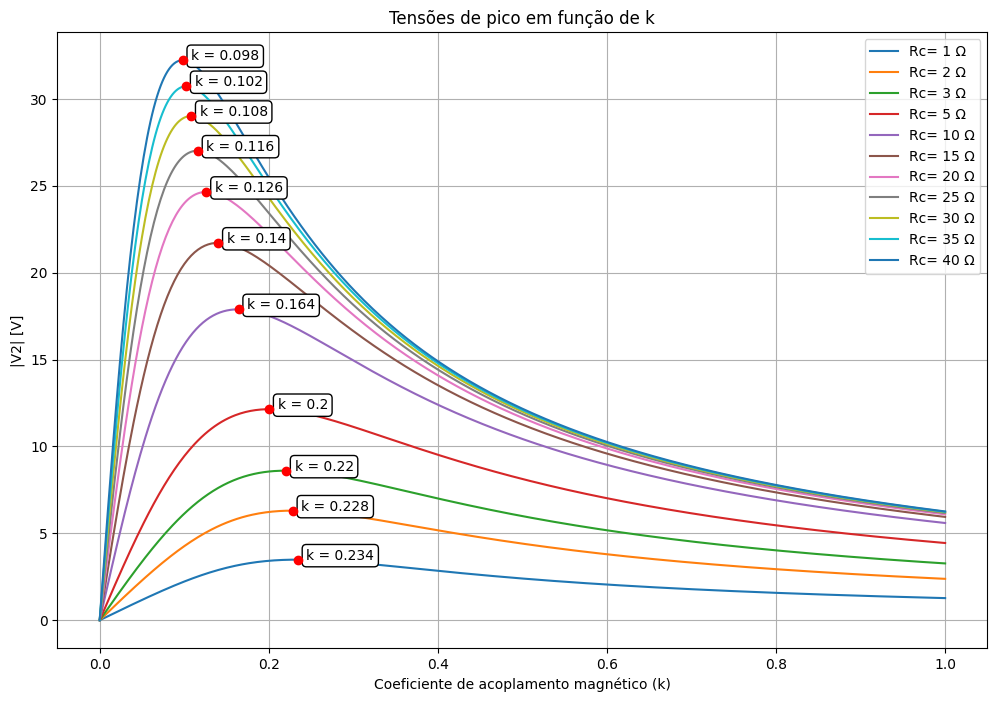

In [215]:
plt.figure(figsize=(12,8))

L1 = L2 = L
C1 = C2 = C


for R in listaRc: 
    Rc = R
    R1 = R2 = calculaR(freqFixo)
    listaV2 = []
    maxk = 0
    maxV2 = 0

    for k in PossiveisK:
            i1, i2, ic , V2 = calculaTransformadorParalelo(k, freqFixo)

            listaV2.append(abs(V2))

            if abs(V2) > maxV2:
                maxk = k

                maxV2 = abs(V2)

    plt.scatter(maxk, maxV2, color='red', zorder=5)
    plt.annotate(f'k = {round(maxk, 3)}', (maxk, maxV2), xytext=(maxk+0.01, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
    
    plt.plot(PossiveisK, listaV2, label=f'Rc= {Rc} Ω')


plt.title("Tensões de pico em função de k")
plt.xlabel("Coeficiente de acoplamento magnético (k)")
plt.ylabel("|V2| [V]")
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()